In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Q = np.linspace(0, 1, 21)

In [3]:
apriori = np.ones_like(Q)

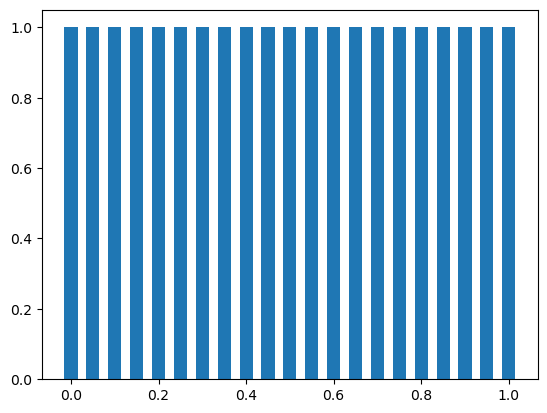

In [7]:
plt.bar(Q, apriori, 0.03);

In [8]:
likelihood_head = Q.copy()

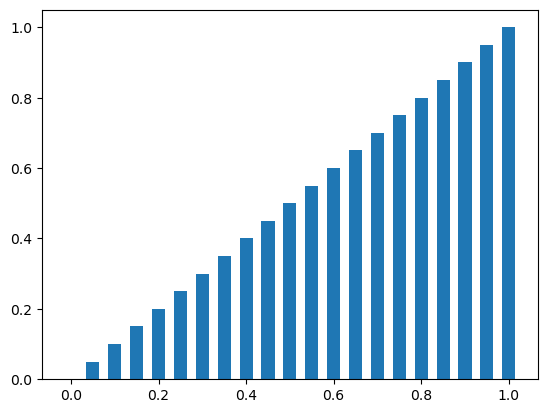

In [10]:
plt.bar(Q, likelihood_head, 0.03);

In [11]:
likelihood_tail = 1-Q

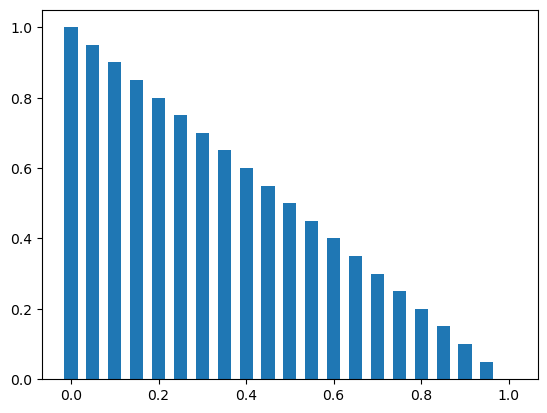

In [12]:
plt.bar(Q, likelihood_tail, 0.03);

In [23]:
Data = [True, True, False, False, True, False, False, True]

In [24]:
posteriori = apriori.copy()

for d in Data:
    if d:
        posteriori *= likelihood_head
    else:
        posteriori *= likelihood_tail

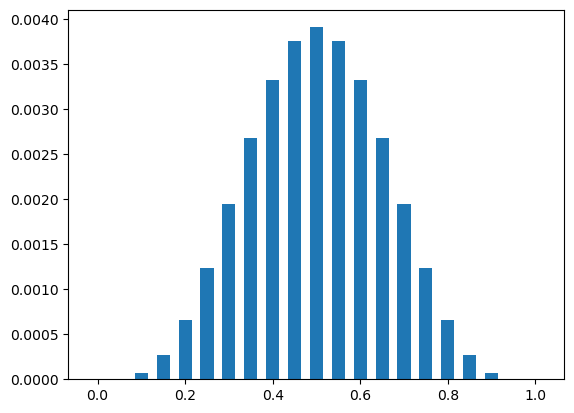

In [25]:
plt.bar(Q, posteriori, 0.03);

In [34]:
a = 2
b = 3
sigma = 1

X = np.random.randn(10)
Y = a*X + b + np.random.randn(10) * sigma

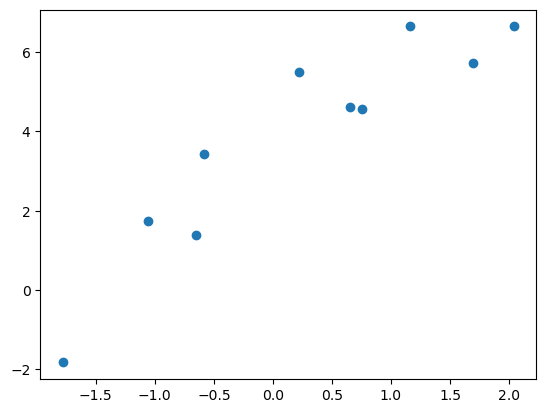

In [35]:
plt.plot(X, Y, "o");

In [57]:
A = np.vstack([X, X**0]).T
np.linalg.solve(A.T@A, A.T@Y)

array([2.00017982, 3.35200745])

In [62]:
A = np.linspace(-3, 7, 2001)
B = np.linspace(-2, 8, 2001)

In [63]:
AA, BB = np.meshgrid(A, B)

In [64]:
apriori = np.ones_like(AA)

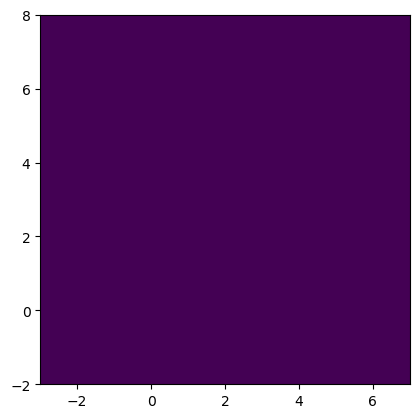

In [65]:
plt.imshow(apriori, extent=[-3, 7, -2, 8]);

In [66]:
def gauss(x, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*(x/sigma)**2)

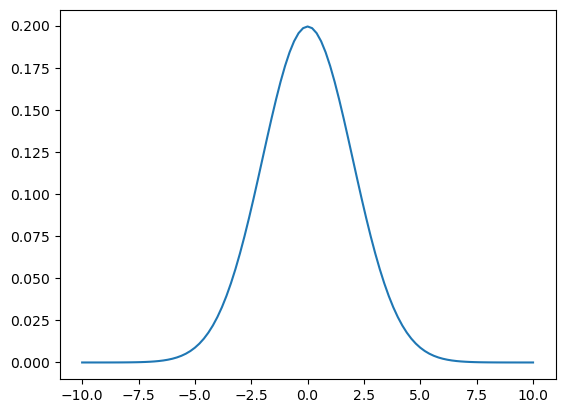

In [67]:
I = np.linspace(-10, 10, 101)
J = gauss(I, 2)
plt.plot(I, J);

In [68]:
def likelihood(a, b, x, y):
    y_hat = a * x + b
    r = y_hat - y
    return gauss(r, sigma)

In [69]:
lh1 = likelihood(AA, BB, X[0], Y[0])

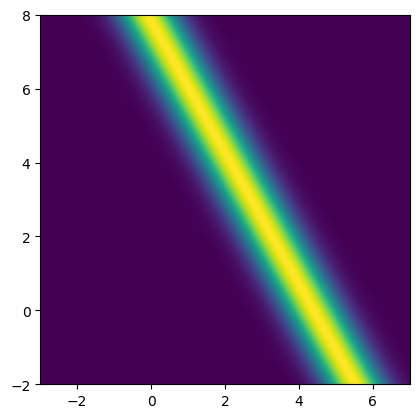

In [70]:
plt.imshow(lh1, extent=[-3, 7, -2, 8]);

In [71]:
posteriori = apriori.copy()

for x, y in zip(X, Y):
    lh = likelihood(AA, BB, x, y)
    posteriori *= lh


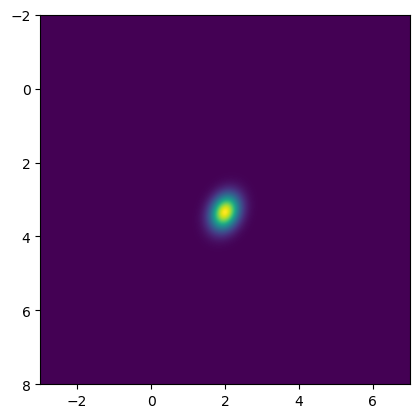

In [72]:
plt.imshow(posteriori, extent=[-3, 7, 8, -2]);


In [73]:
posteriori.argmax()

2142070

In [75]:
2142070//2001, 2142070%2001

(1070, 1000)

In [76]:
-3 + (7+3)/2001*1000

1.997501249375313

In [77]:
-2 + (8+2)/2001*1070

3.3473263368315846